In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
%matplotlib inline

In [73]:
### Formato general plots

In [74]:
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Colores en una imagen

### RGB

$r, g, b \in [0, 255]$

In [4]:
block1 = np.array([[[0.04282903, 0.84235555, 0.53525768],
        [0.4680471, 0.20634024, 0.49634548],
        [0.05570783, 0.29014397, 0.60433981]]])

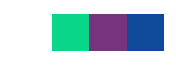

In [5]:
plt.figure(figsize = (2,2))
plt.imshow(block1)
plt.axis("off")
plt.show();

In [6]:
block2 = np.array([[[124, 200, 18],
        [234, 133, 13],
        [123, 231, 85]]], dtype = "uint8")

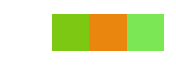

In [7]:
plt.figure(figsize = (2,2))
plt.imshow(block2)
plt.axis("off")
plt.show();

### Colores con opacidad 

In [8]:
block3 = np.array([[[124, 200, 18, .1],
        [234, 133, 13, .51],
        [123, 231, 85, .61]]])

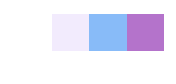

In [9]:
plt.figure(figsize = (2,2))
plt.imshow(block3)
plt.axis("off")
plt.show();

### Una foto

In [10]:
import matplotlib.image as mpimg

In [11]:
pic = mpimg.imread("pic.jpg")

In [12]:
pic.shape

(700, 1120, 3)

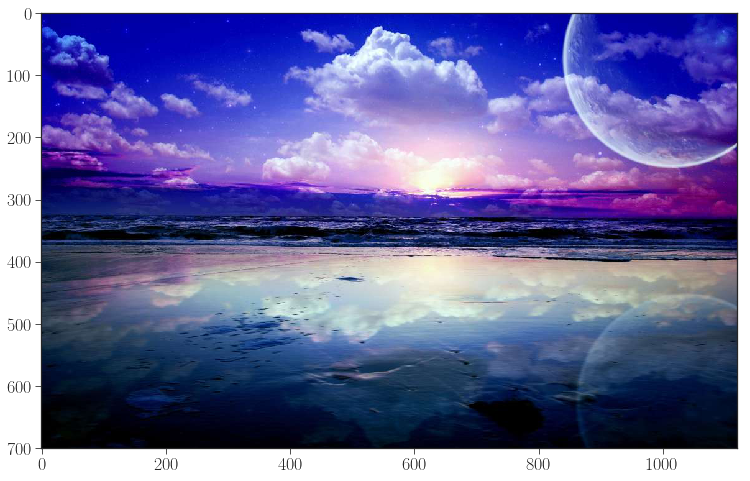

In [13]:
plt.figure(figsize = (20,8))
plt.imshow(pic)
plt.axis("on")
#plt.savefig("katy2.jpg", dpi = 600)
plt.show()

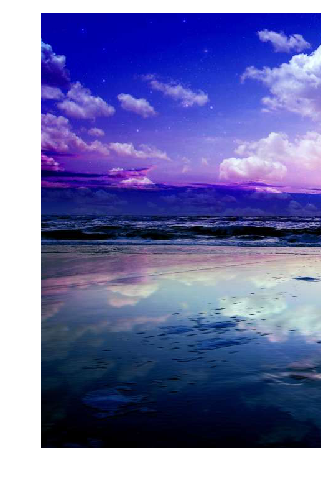

In [14]:
plt.figure(figsize = (20,8))
plt.imshow(pic[:, 70:520])
plt.axis("off")
#plt.savefig("pic2.jpg", dpi = 600)
plt.show()

In [15]:
pic[:2]

array([[[  1,   4, 133],
        [  1,   4, 133],
        [  1,   4, 135],
        ...,
        [  4,   1, 140],
        [  4,   1, 140],
        [  4,   1, 140]],

       [[  1,   4, 133],
        [  1,   4, 135],
        [  1,   4, 137],
        ...,
        [  4,   1, 140],
        [  4,   1, 140],
        [  4,   1, 140]]], dtype=uint8)

In [16]:
pic.shape

(700, 1120, 3)

`(high, width, channels)`

In [17]:
pic.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [18]:
pic.setflags(write=1)

In [19]:
import copy

In [20]:
picG = pic.copy()

In [21]:
reddish = picG[:, :, 0] > 160
picG[reddish] = [0, 255, 0]

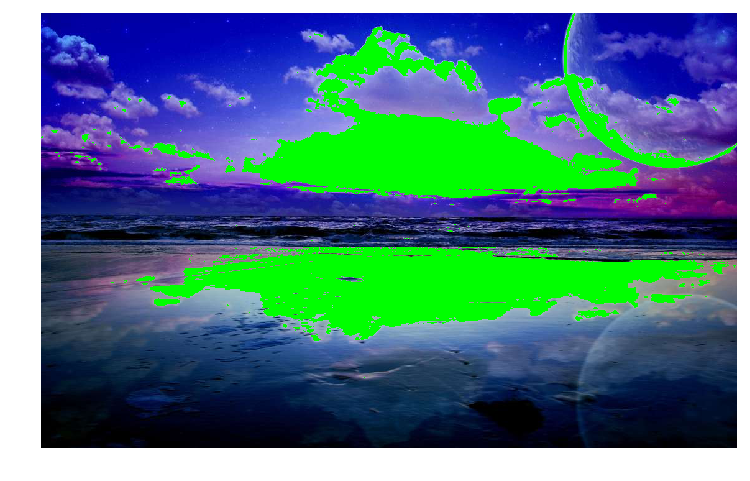

In [22]:
plt.figure(figsize = (20,8))
plt.imshow(picG)
plt.axis("off");

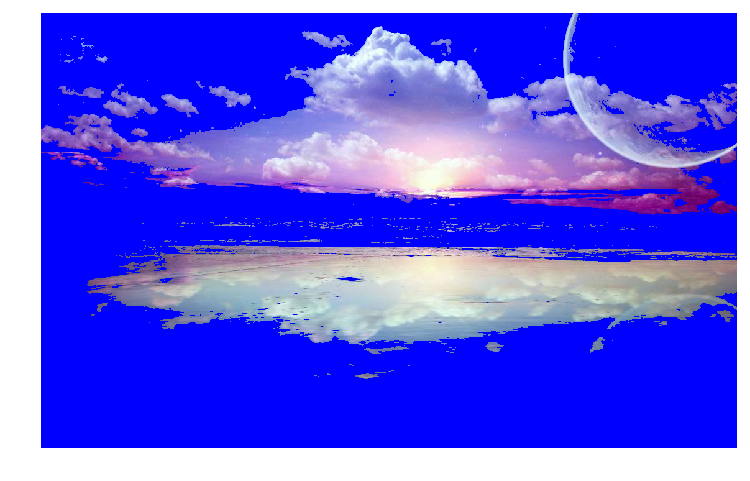

In [23]:
plt.figure(figsize = (20,8))
picB = pic.copy()
reddish = picB[:, :, 0] < 100
picB[reddish] = [0, 0, 255]
plt.imshow(picB)
plt.axis("off");

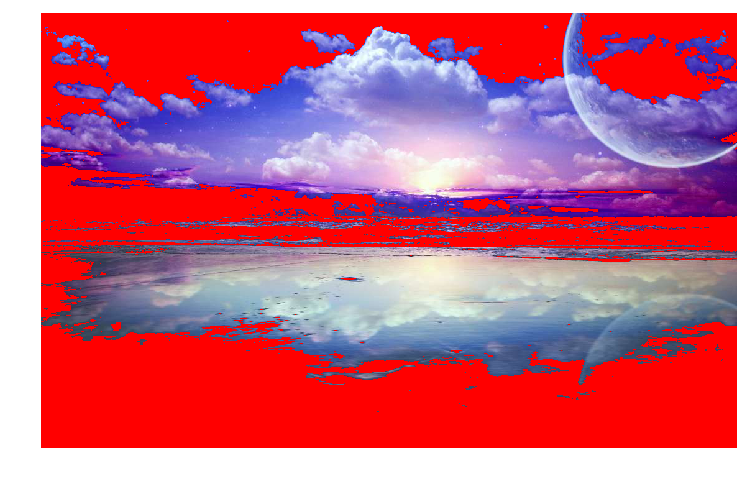

In [24]:
plt.figure(figsize = (20,8))
picR = pic.copy()
reddish = picR[:, :, 0] < 50
picR[reddish] = [255, 0, 0]
plt.imshow(picR)
plt.axis("off");

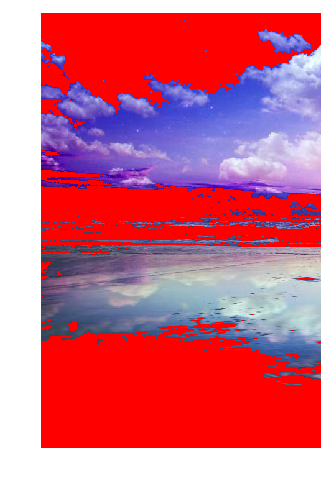

In [25]:
plt.figure(figsize = (20,8))
plt.imshow(picR[:, 70:520])
plt.axis("off")
#plt.savefig("pic2.jpg", dpi = 600)
plt.show()

In [26]:
from scipy import ndimage

In [27]:
blurred_f = ndimage.gaussian_filter(pic, 3)

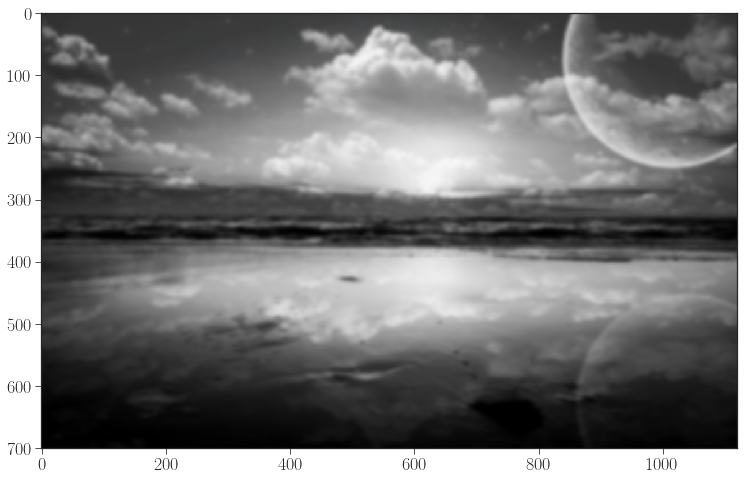

In [28]:
plt.figure(figsize = (20,8))
plt.imshow(blurred_f);

#### Ahora creamos nuestra propia imagen.

In [29]:
noise = np.random.randint(0,256,(200, 1000, 3), dtype = "uint8")

In [30]:
noise.shape

(200, 1000, 3)

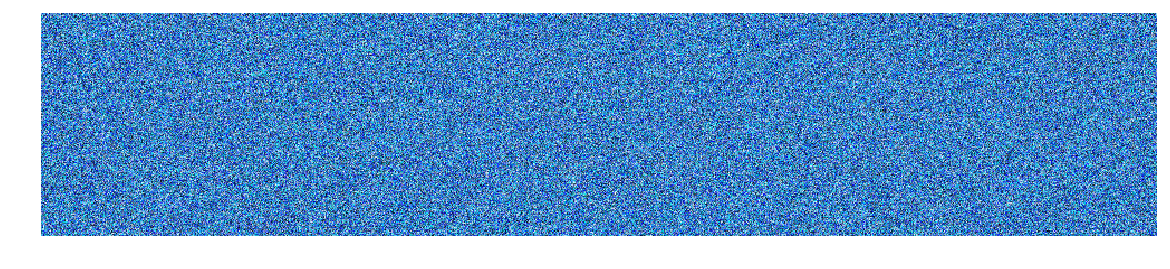

In [31]:
plt.figure(figsize=(20,8))
plt.imshow(np.sort(noise))
plt.axis("off");

In [32]:
syN1 = ndimage.gaussian_filter(np.sort(noise), 4)

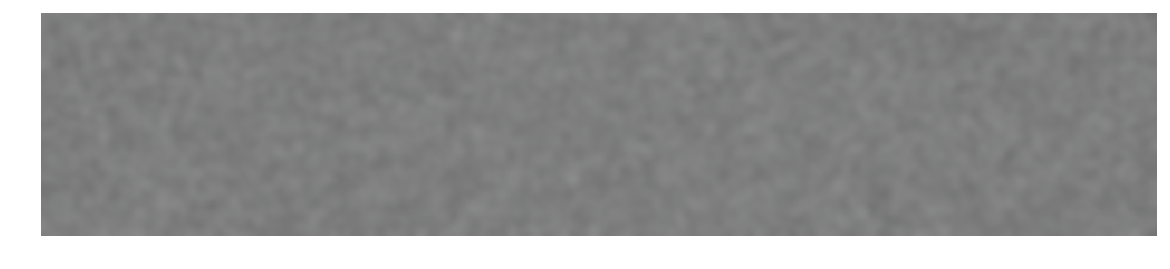

In [33]:
plt.figure(figsize=(20,8))
plt.imshow(syN1, cmap = "icefire_r")
plt.axis("off");

In [34]:
noiseGray = np.random.randint(0,256,(200, 1000), dtype = "uint8")

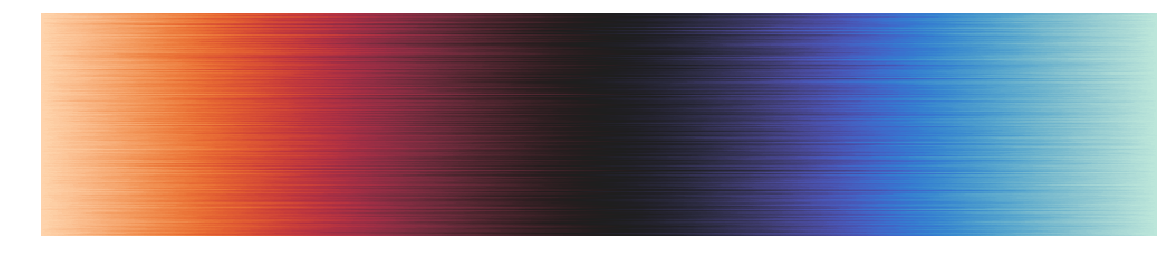

In [35]:
plt.figure(figsize=(20,8))
plt.imshow(np.sort(noiseGray), cmap = "icefire_r")
plt.axis("off");

In [36]:
syN = ndimage.gaussian_filter(np.sort(noiseGray), 4)

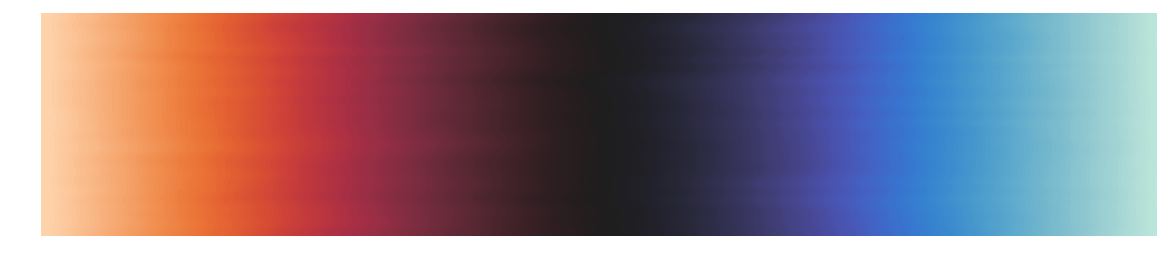

In [37]:
plt.figure(figsize=(20,8))
plt.imshow(syN, cmap = "icefire_r")
plt.axis("off");

### Clasificación Binaria

Está sección la vamos a tratar un poco mas serio de lo que está en las notas. Como sigue. 

###  Notación
En adelante seguiremos la siguiente notación.
Un ejemplo de entrenamiento se representa por la pareja ordenada $(\boldsymbol{x},y)$, donde $\boldsymbol{x}\in\mathbb{R}^n$ y $y\in\left\lbrace0,1\right\rbrace$.

Tendremos $m$ ejemplos de entrenamiento, de modo que nuestro conjunto de entrenamiento será 

 $$M = \left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$$.

Por otra parte, para presentar de forma más compacta las entradas de entrenamiento, definimos la matriz

$$\boldsymbol{X}=\left[\begin{array}{c} {\boldsymbol{x}^1},  {\boldsymbol{x}^2}, \cdots , {\boldsymbol{x}^m} \end{array}\right]\in\mathbb{R}^{n\times m},$$

cuyas filas son los vectores de entrenamiento de entrada transpuestos, y el vector

$$\boldsymbol{Y}=\left[\begin{array}{c} y^1, y^2,  \cdots, y^m \end{array}\right]\in\mathbb{R}^{1\times m},$$

cuyas componentes son las etiquetas (salidas) de entrenamiento.

### Datos

In [68]:
import pandas as pd
data_scores = pd.read_csv("data_classification.csv")

In [69]:
data_scores[:5]

Estudio     Sueño  Valoracion
0  4.855064  9.639962           1
1  8.625440  0.058927           0
2  3.828192  0.723199           0
3  7.150955  3.899420           1
4  6.477900  8.198181           1

In [70]:
data_scores.head()

Estudio     Sueño  Valoracion
0  4.855064  9.639962           1
1  8.625440  0.058927           0
2  3.828192  0.723199           0
3  7.150955  3.899420           1
4  6.477900  8.198181           1

In [71]:
data_scores.tail()

Estudio     Sueño  Valoracion
95  0.022280  2.658428           0
96  7.630637  7.405351           1
97  3.684997  5.049965           0
98  7.484260  6.059396           1
99  2.030708  3.937267           0

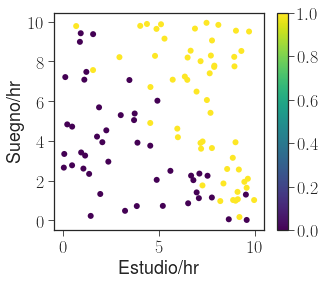

In [90]:
plt.figure(figsize = (4.7,4))
plt.scatter(data_scores["Estudio"], data_scores["Sueño"],
            lw = 0, cmap = "viridis", c = data_scores["Valoracion"])
plt.xlabel("Estudio/hr", fontsize = 18)
plt.ylabel("Suegno/hr", fontsize = 18)
plt.colorbar()
plt.show()

In [96]:
caracteristicas = data_scores[["Estudio", "Sueño"]].values

In [97]:
caracteristicas[:3]

array([[4.85506424, 9.63996157],
       [8.62543976, 0.05892653],
       [3.82819154, 0.72319923]])

In [98]:
caracteristicas.shape

(100, 2)

In [99]:
bias = np.ones(shape=(len(caracteristicas),1))
caracteristicas = np.append(bias, caracteristicas, axis=1)

In [100]:
caracteristicas.shape

(100, 3)

In [101]:
caracteristicas[:2]

array([[1.        , 4.85506424, 9.63996157],
       [1.        , 8.62543976, 0.05892653]])

In [102]:
etiquetas = data_scores["Valoracion"].values

In [103]:
etiquetas.shape

(100,)

In [105]:
etiquetas[:5]

array([1, 0, 0, 1, 1])

In [106]:
etiquetas = etiquetas[:, np.newaxis]

In [107]:
etiquetas.shape

(100, 1)

In [108]:
etiquetas[:4]

array([[1],
       [0],
       [0],
       [1]])

### Regresión logística

$$S(z) = \frac{1}{1 + e^{-z}}\quad \mbox{donde}\quad z = w^{T}x + b = \mathbf{W}^T\mathbf{x}$$

El vector de pesos se inicializa de forma arbitraria. En este caso con ceros, también se puede hacer de forma aleatoria. Pero, primero veamos como se comporta esta función en general. 

In [109]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

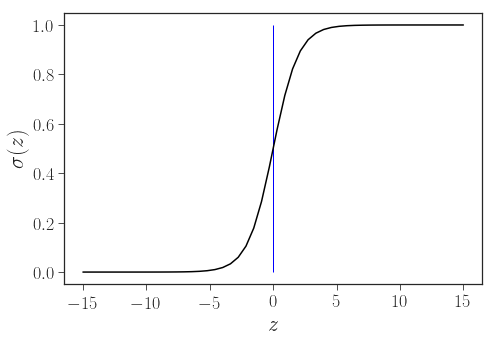

In [110]:
z = np.linspace(-15, 15)
plt.figure(figsize = (7.5,5))
plt.plot(z, sigmoid(z), lw = 1.5, color = "black")
plt.vlines(0, 0,1, color = "b", lw = 1)
plt.xlabel('$z$', fontsize = 22)
plt.ylabel('$\sigma(z)$', fontsize = 22)
plt.grid(False)
plt.show()

In [51]:
def predecir(caracteristicas, pesos):
    """
    Regresa 1D array de probabilidades
    Cuidado con las dimensiones que ponenen:
    Caracteristicas:(m,n)
    Pesos:(n,1)
    
    """
    z = np.dot(caracteristicas, pesos)
    return sigmoid(z)

caracteristicas, es el vector $x$. 

### Función de costo (función de error)

$$\mathcal{L}(\hat{y}, y) = -\left(y \log(\hat{y}) + (1-y)\log(1- \hat{y})\right)$$
definida sobre una entrada del conjunto de datos. Y para el total de datos se define

$$J(W,b) = J(\mathbf{W})=  \frac{1}{m}\sum_{i = 1}^{m} \mathcal{L}(\hat{y}^{i}, y^{i})$$
Entonces, el objetivo es minimizar el costo total (error total), para así estar lo mas cerca posible de nuestras clases de interés. Si logramos hacer esto, tendremos un modelo. <font color = red> **En resumen, buscamos parámetro $W$ y $b$ que minimicen $J$.** </font>. 

In [52]:
def funcion_costo(caracteristicas, etiquetas, pesos):
    """
    Regresa 1D array de probabilidades
    Cuidado con las dimensiones que ponenen:
    Caracteristicas:(m,n)
    Pesos:(n,1)
    
    """
    predicciones = predecir(caracteristicas, pesos)
    # Costo total de etiqueta 1 y etiqueta 0
    costo = -np.mean(etiquetas*np.log(predicciones) + (1 - etiquetas)*np.log(1 - predicciones))
    return costo

##### Vamos a usar el algoritmos de la gradiente descendente. 
Básicamente consiste en ir actualizando los pesos de la siguiente forma:

$$w = w - \alpha \frac{\partial J}{\partial w},\quad b = b - \alpha\frac{\partial J}{\partial b}$$

Para la función logistica sería 

In [53]:
def actualizar_pesos(caracteristicas, etiquetas, pesos, lr):
    """
    Regresa 1D array de probabilidades
    Cuidado con las dimensiones que ponenen:
    Caracteristicas:(m,n)
    Pesos:(n,1)
    
    """
    m = len(caracteristicas)
    predicciones = predecir(caracteristicas, pesos)
    gradiente = np.dot(caracteristicas.T,  predicciones - etiquetas)
    gradiente /= m # recordar dividir sobre el total de muestras
    gradiente *= lr # razón de aprendijaze
    pesos -= gradiente # actualizar pesos
    return pesos

### Inicializar los pesos

In [111]:
pesos = np.zeros((3,1))

In [112]:
pesos

array([[0.],
       [0.],
       [0.]])

In [113]:
pesos.shape

(3, 1)

In [114]:
caracteristicas.shape

(100, 3)

In [115]:
etiquetas.shape

(100, 1)

In [116]:
caracteristicas[:5]

array([[1.        , 4.85506424, 9.63996157],
       [1.        , 8.62543976, 0.05892653],
       [1.        , 3.82819154, 0.72319923],
       [1.        , 7.15095484, 3.89942042],
       [1.        , 6.47790044, 8.19818055]])

### Veamos si funcionan las funciones definidas anteriormente

In [60]:
predecir(caracteristicas, pesos)[:3]

array([[0.5],
       [0.5],
       [0.5]])

In [61]:
funcion_costo(caracteristicas, etiquetas, pesos)

0.6931471805599453

In [62]:
actualizar_pesos(caracteristicas, etiquetas, pesos, 0.01)

array([[0.0005    ],
       [0.01180098],
       [0.0081587 ]])

### Entrenamiento 

In [117]:
def entrenar(caracteristicas, etiquetas, pesos, lr, iteraciones):
    """
    Regresa 1D array de probabilidades
    Cuidado con las dimensiones que ponenen:
    Caracteristicas:(m,n)
    Pesos:(n,1)
    
    """
    historial_costos = []

    for i in range(iteraciones):
        pesos = actualizar_pesos(caracteristicas, etiquetas, pesos, lr)

        #Calcular el error, para ver el avance de aprendizaje
        costo = funcion_costo(caracteristicas, etiquetas, pesos)
        historial_costos.append(costo)

        # Imprimir avance de la evaluacion
        if i % 100 == 0:
            print(".", end = " ")

    return pesos, historial_costos

In [118]:
modelo = entrenar(caracteristicas, etiquetas, pesos, .1, 3000)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

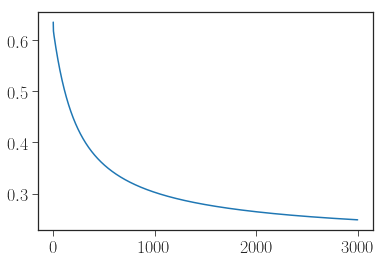

In [119]:
plt.plot(modelo[1])
plt.show()

In [121]:
pesos

array([[-8.19752993],
       [ 0.92123834],
       [ 0.73888818]])

In [130]:
predecir(np.array([[1, 1, 10]]), pesos)

array([[0.52811787]])

In [128]:
caracteristicas.shape

(100, 3)

In [124]:
caracteristicas[:2]

array([[1.        , 4.85506424, 9.63996157],
       [1.        , 8.62543976, 0.05892653]])

In [67]:
modelo[1][-1]

0.2486503800434404